<a href="https://colab.research.google.com/github/rohitchauhan2004/Stock-Market-Prediction-using-LSTM-/blob/main/Stock_Market_Prediction_Model_Creation_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-11-19'
stock = 'TATAMOTORS.NS'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data//

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02 00:00:00+00:00,175.647964,181.997894,183.086212,176.902542,179.029724,10175802
1,2012-01-03 00:00:00+00:00,185.196640,191.891769,192.732742,184.224014,184.273483,15868503
2,2012-01-04 00:00:00+00:00,192.119431,199.064835,200.351028,190.951843,191.792831,22752471
3,2012-01-05 00:00:00+00:00,192.978806,199.955276,203.566544,198.075439,198.817490,21640778
4,2012-01-06 00:00:00+00:00,194.411118,201.439362,202.824509,196.393478,197.877563,13553191
...,...,...,...,...,...,...,...
2678,2022-11-14 00:00:00+00:00,431.022400,433.700012,437.700012,423.500000,424.000000,17996083
2679,2022-11-15 00:00:00+00:00,434.451080,437.149994,438.500000,434.100006,434.899994,10696024
2680,2022-11-16 00:00:00+00:00,428.885651,431.549988,438.200012,429.600006,436.950012,8206169


In [ ]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03
mean,334.009903,336.943550,342.306155,332.021758,337.458829,2.143434e+07
std,126.370914,126.865259,128.180599,125.687165,127.105703,2.924351e+07
min,64.896851,65.300003,66.900002,63.500000,66.500000,0.000000e+00
25%,244.009148,248.320290,252.495354,242.772095,248.913399,6.406657e+06
50%,339.055511,341.500000,347.250000,335.946625,341.239868,1.049052e+07
75%,434.873459,437.850006,445.335938,432.774994,439.791443,2.257893e+07
max,594.200928,598.134399,605.901123,589.873047,600.212097,3.905778e+08


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

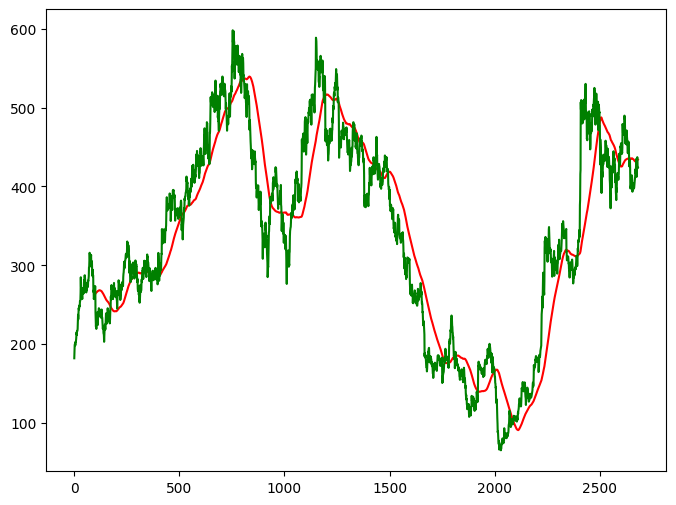

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()


In [ ]:
ma_200_days = data.Close.rolling(200).mean()

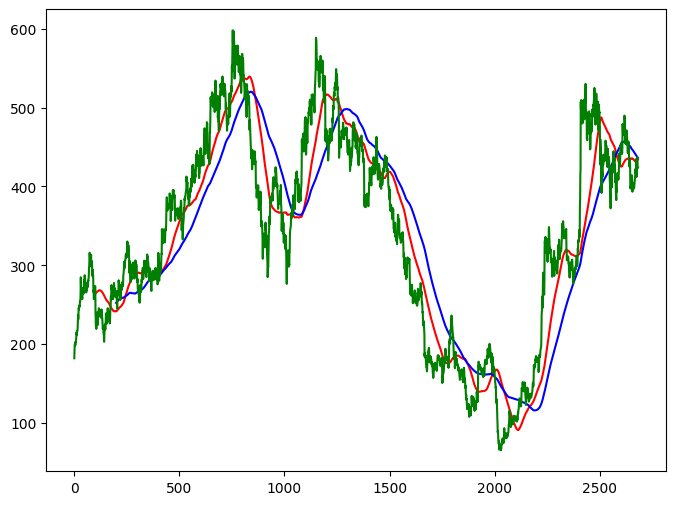

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

# Exponential Smoothening - More weight to recent obseravtions

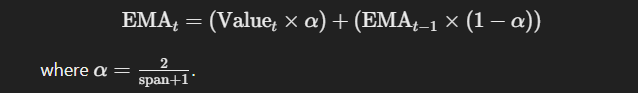

## Gains: Use .where() to keep only positive values from delta and replace the rest with 0.
##Losses: Use .where() to keep only negative values, take their absolute values (by negating delta), and replace the rest with 0.


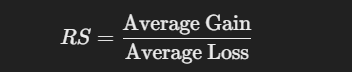

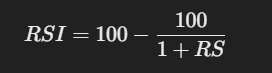

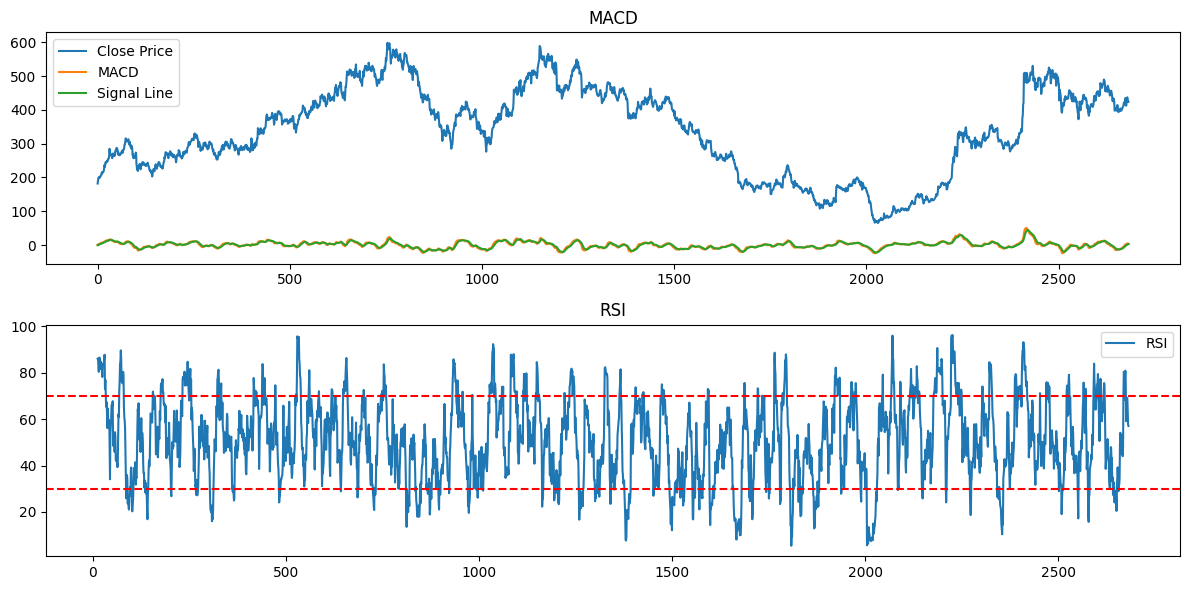

In [ ]:
#EWM - Exponential Weighted Moving Average
exp1 = data['Close'].ewm(span=12, adjust=False).mean() #Fast EMA
exp2 = data['Close'].ewm(span=26, adjust=False).mean() #Slow EMA
macd = exp1 - exp2 #MACD
signal = macd.ewm(span=9, adjust=False).mean()  #Signal
data['MACD'] = macd
data['Signal Line'] = signal

# Calculate RSI
delta = data['Close'].diff()                #Difference between consicutive closing prices
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = rsi


# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MACD'], label='MACD')
plt.plot(data['Signal Line'], label='Signal Line')
plt.legend()
plt.title('MACD')

plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI')
plt.axhline(y=30, color='r', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.legend()
plt.title('RSI')

plt.tight_layout()
plt.show()

#Pearson Correlation Coefficient

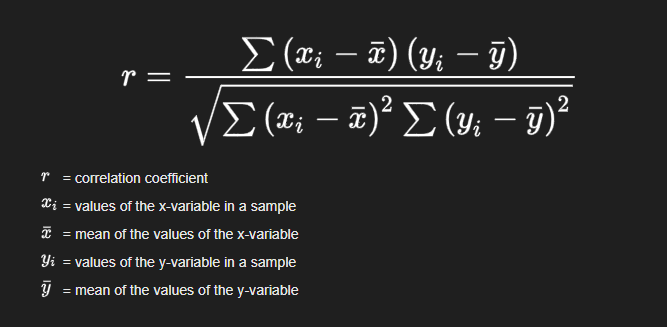

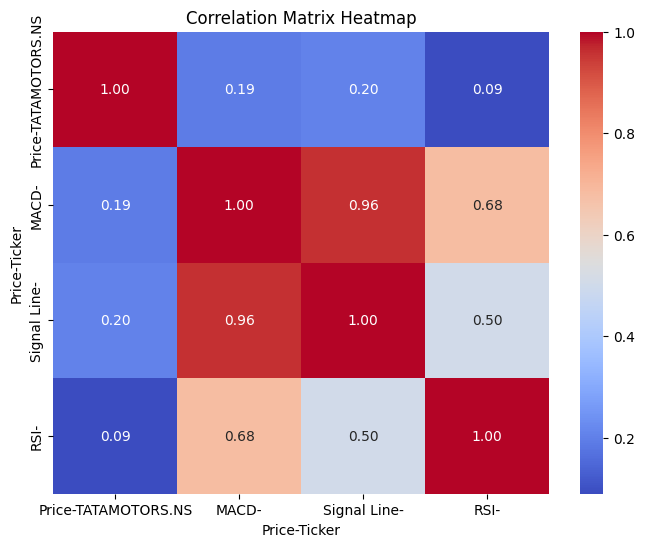

In [ ]:
# Rename 'Close' column to 'Price' if needed
data = data.rename(columns={'Close': 'Price'})

# Prepare data for correlation analysis
correlation_data = data[['Price', 'MACD', 'Signal Line', 'RSI']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
data.dropna(inplace=True) #Drop NaN values in place

#Train test Split

In [ ]:
data_train = pd.DataFrame(data.Price[0: int(len(data)*0.80)]) # Changed data.Close to data.Price
data_test = pd.DataFrame(data.Price[int(len(data)*0.80): len(data)]) # Changed data.Close to data.Price

In [ ]:
data_train.shape[0]

2136

In [ ]:
data_test.shape[0]

534

#Min Max Scalar

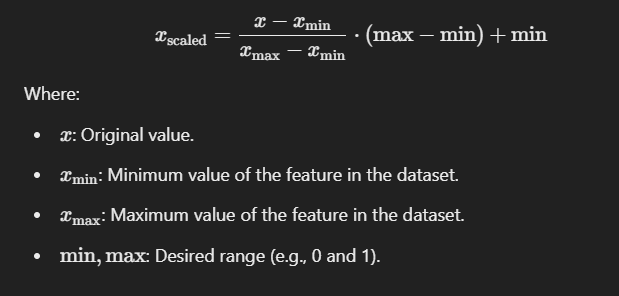

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# Data Normalization Using Min Max Scalar From Sckit-learn
#Scale features, regularization(overfitting), improve training convergence(large step size)

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):   #100 Step Size
    x.append(data_train_scale[i-100:i])           #slice 100 days window
    y.append(data_train_scale[i,0])               #next element


In [ ]:
x, y = np.array(x), np.array(y)                   #convert to array

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

##Layer Stacking for Complex patterns
##RelU-For only positive values and vanishing gradient problem
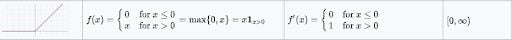
#Sigmoid and Tanh suffer saturation
#Dropout Regularization: Prevents overfitting

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,      # Firts Layer 50 neurons
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))     #20% dropout

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Adaptive moment Estimation - Momentum and Oscillations

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

##Dataset/batches*epochs

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1) #Verbose to display output steps

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - loss: 0.1175
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0145
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0104
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0099
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 0.0084
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 0.0076
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0084
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0078
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0068
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0073
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0066
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0074
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0058
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0058
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 200, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 200, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 200, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

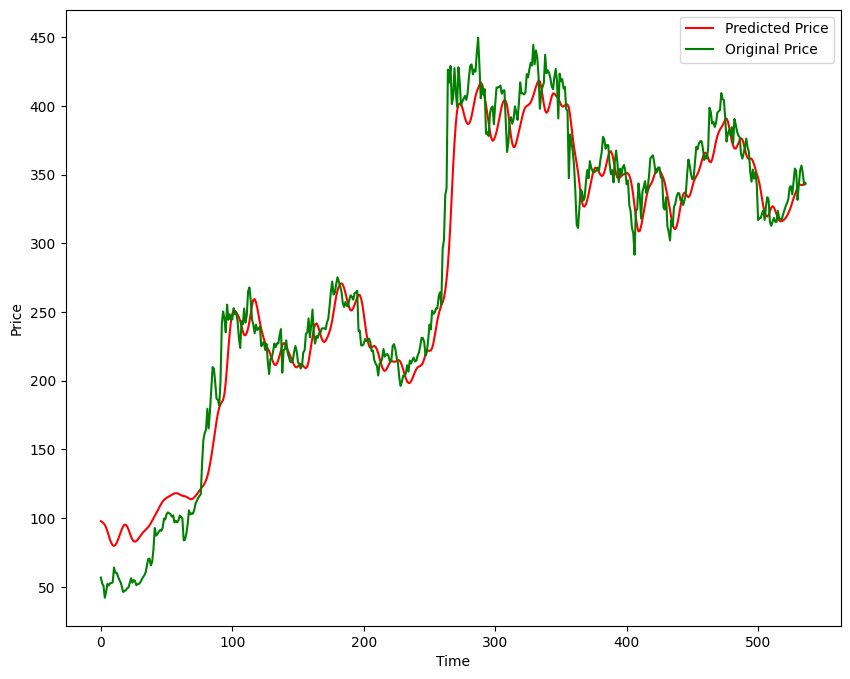

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import the numpy library and give it the alias 'np'

# Calculate metrics suitable for regression
mse = mean_squared_error(y, y_predict)  # Mean Squared Error
rmse = mse**0.5 / np.mean(y)  # Root Mean Squared Error using np.mean
r2 = r2_score(y, y_predict)  # R-squared

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 499.40
Root Mean Squared Error (RMSE): 0.08
R-squared (R2): 0.96
